* https://www.bok.or.kr/portal/bbs/B0000249/view.do?nttId=235017&menuNo=200765


### 머신러닝 분류
* 결정트리
    - 장점: 직관적/데이터 스케일링의 영향 없음
    - 단점: 과적합/성능
* 보완 
    - 단일 트리 방식으로 성능 한계
    - 앙상블
        * 여러 머신러닝의 연결
* white box
----   
* black box
* 랜덤 포레스트
    - 앙상블 기법을 활용 성능 향상
* 보완 
- 부스팅


### 앙상블
* 보팅 Voting
    - 서로 다른 분류기 결합
    종류
        - 소프트 보팅
        - 하드 보팅
* 배깅
    - 동일 분류기의 샘플 그룹 나눠서 검증
    - CV(교차검증) 과 달리 중복 샘플링 허용
    - 개별데이터 샘플링 추출방식: 부트스트래이핑

* 부스팅
    - 순차학습간 이전 학습분류기의 틀린 데이터에 대한 가중치 부여
    


### 보팅 분류기(Voting Classifier)


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# cancer['data']
# cancer['target']
# cancer['target_names']
# cancer['DESCR']
# cancer['feature_names']

In [2]:
cancer=load_breast_cancer()
cancer.__dir__

<bound method Bunch.__dir__ of {'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 

In [3]:
cdf=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
cdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
cdf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
#sns.pairplot(cdf)

In [6]:
cdf['target']=cancer['target']

In [7]:
tdf=cdf.iloc[:,[0,1,2,3,4,5,30]].copy()
tdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0


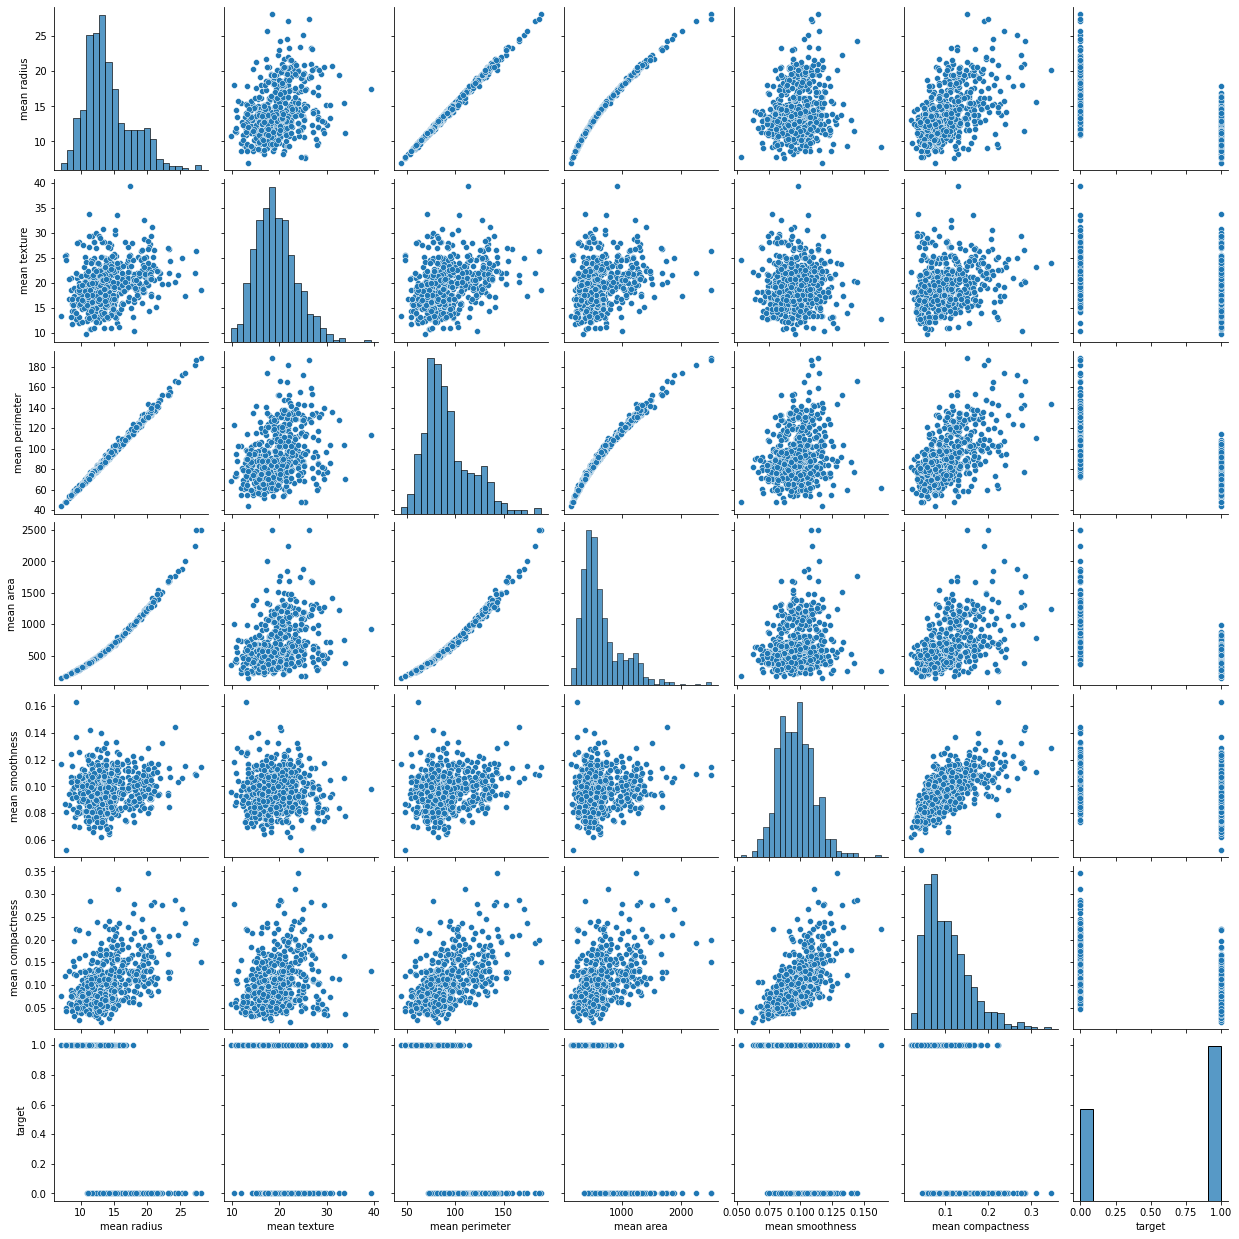

In [8]:
sns.pairplot(tdf)

<AxesSubplot:>

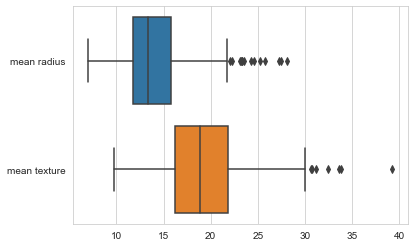

In [9]:
sns.set_style('whitegrid')
sns.boxplot(data=tdf.iloc[:,:2],orient='h')

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtcls=DecisionTreeClassifier()
logclf=LogisticRegression(max_iter=10000) #  경고 메시지 뜰때 처리
knnclf=KNeighborsClassifier(n_neighbors=20)
vo_clf=VotingClassifier(estimators=[('LR',logclf),('KNN',knnclf)],voting='soft')
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               test_size=0.2,random_state=1)
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
acc=accuracy_score(y_test,pred)
print("정확도:",acc)
# hard voting 0.9473
# soft voting 0.9561
# 정확도:( LogisticRegression ) 0.9473684210526315
# 정확도:( KNeighborsClassifier ) 0.9122807017543859

정확도: 0.9385964912280702


In [11]:
clfs=[logclf,knnclf,dtcls]
for clf in clfs:
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc=accuracy_score(y_test,pred)
    class_name=clf.__class__.__name__
    print("정확도:(",class_name,")",acc)

정확도:( LogisticRegression ) 0.9473684210526315
정확도:( KNeighborsClassifier ) 0.9122807017543859
정확도:( DecisionTreeClassifier ) 0.9473684210526315


### 랜덤 포리스트
* 결정트리기반의 알고리즘으로 결정트리의 단점을 보완
* 결정 트리 기반의 배깅 모델을 기반
    - 부트스트래이핑 중복 샘플링 기법 사용
    - CV(교차검증)과는 달리 중복 데이터 세트 샘플링이 가능

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier(random_state=1)
rfclf.fit(X_train,y_train)
pred=rfclf.predict(X_test)
acc=accuracy_score(y_test,pred)
acc
# hard voting 0.9473
# soft voting 0.9561
# 정확도:( LogisticRegression ) 0.9473684210526315
# 정확도:( KNeighborsClassifier ) 0.9473684210526315
# RF                            0.956140350877193

0.956140350877193

In [13]:
# 하이퍼 파라미터 튜닝을 위해 SKlearn 에서 제공하는 모델 선택 라이브러리
from sklearn.model_selection import GridSearchCV
# 모델 파라미터 설정
params={
    'n_estimators':[100],
    'max_depth':[2,4,6,8,10,12],
    'max_features':[2,4,6,8,10,12],
    'max_samples':[2,4,6,8,10,12,15,20]
    #'max_leaf_nodes':[2,4,6,8,10,12,15,20],
    #'min_samples_leaf':[2,4,6,8,10,12,15,20],
    #'min_samples_split':[2,4,6,8,10,12,15,20]
}
# 테스트할 모델 설정
rftest=RandomForestClassifier(random_state=1,n_jobs=-1)
#그리드서치활용 최적 파라미터 설정
gridcv=GridSearchCV(rftest,param_grid=params,cv=4,n_jobs=-1)
gridcv.fit(X_train,y_train)
print("gridcv 활용 최적 정확도:",gridcv.best_score_)

gridcv 활용 최적 정확도: 0.9429048284427883


In [14]:
print("gridcv 활용 최적 정확도:",gridcv.best_params_)

gridcv 활용 최적 정확도: {'max_depth': 4, 'max_features': 2, 'max_samples': 15, 'n_estimators': 100}


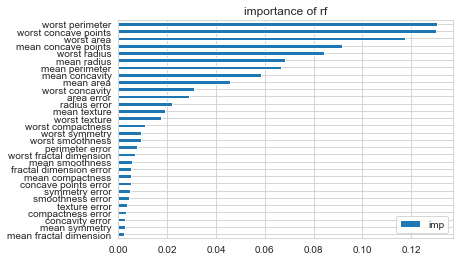

In [15]:
import matplotlib.pyplot as plt
rfimp=rfclf.feature_importances_
rfimpdf=pd.DataFrame(rfimp,columns=['imp'],index=cancer['feature_names'])
rfimpdf.sort_values(by='imp').plot.barh()
plt.title('importance of rf')
plt.show()